<IPython.core.display.Javascript object>


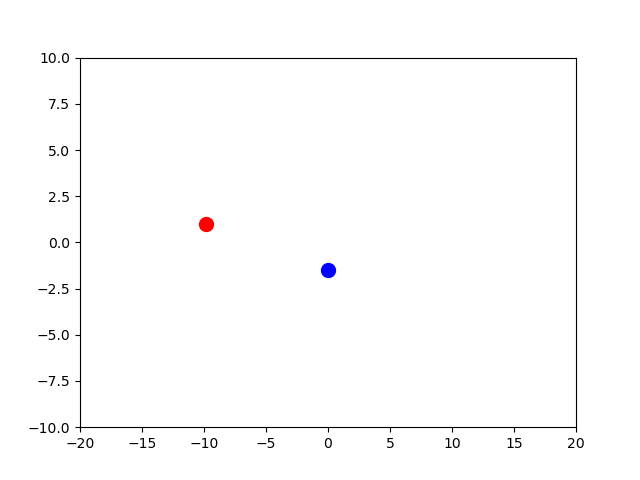

In [3]:

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


K, m, R = 100, 1, 2
epsilon, duration, dt, tmax = 0.5, 0.1, 0.01, 5

r1 = np.array([-15, 1])
v1 = np.array([10, 0]) 
a1 = np.array([0, 0])
r2 = np.array([0, -1.5]) 
v2 = np.array([0, 0])
a2 = np.array([0, 0])
fig, ax = plt.subplots()
ax.set_xlim(-20, 20)
ax.set_ylim(-10, 10)
scatter1 = ax.scatter(r1[0], r1[1], s=100, color='red')
scatter2 = ax.scatter(r2[0], r2[1], s=100, color='blue')


def actualizar(frame):
    global r1, r2, v1, v2, a1, a2
# Pared
    left_wall = -20
    right_wall = 20
    top_wall = 10
    bottom_wall = -10
    if r1[0] < left_wall:
        r1[0] = left_wall
        v1[0] = -v1[0]
    if r1[0] > right_wall:
        r1[0] = right_wall
        v1[0] = -v1[0]
    if r1[1] < bottom_wall:
        r1[1] = bottom_wall
        v1[1] = -v1[1]
    if r1[1] > top_wall:
        r1[1] = top_wall
        v1[1] = -v1[1]

    if r2[0] < left_wall:
        r2[0] = left_wall
        v2[0] = -v2[0]
    if r2[0] > right_wall:
        r2[0] = right_wall
        v2[0] = -v2[0]
    if r2[1] < bottom_wall:
        r2[1] = bottom_wall
        v2[1] = -v2[1]
    if r2[1] > top_wall:
        r2[1] = top_wall
        v2[1] = -v2[1]
    #Landau-Lifshitz
    r = r2 - r1
    v = v2 - v1
    d = np.linalg.norm(r)
    n = r / d
    fn = -K * d * n
    ft = -K * d * epsilon * v
    if d < R:
        f = fn + ft
        tcol = duration
    else:
        f = np.zeros(2)
        tcol = tmax

    a1 = f / m
    a2 = -f / m
    r1, r2 = r1 + v1 * dt + 0.5 * a1 * dt*2, r2 + v2 * dt + 0.5 * a2 * dt*2
    v1, v2 = v1 + a1 * dt, v2 + a2 * dt

    if d < R:
        vrel = v2 - v1
        v1, v2 = v1 - epsilon * (np.dot(vrel, n)) * n, v2 - epsilon * (np.dot(vrel, n)) * n

    scatter1.set_offsets(r1)
    scatter2.set_offsets(r2)

    return scatter1, scatter2

anim = animation.FuncAnimation(fig, actualizar, frames=np.arange(0, tmax, dt*10), interval=dt*1000, blit=True)
plt.show()

